In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt
from metocean_api import ts
import tqdm
import xarray as xr


In [2]:
url="https://opendap.4tu.nl/thredds/dodsC/data2/djht/f359cd0f-d135-416c-9118-e79dccba57b9/1/2021/TU-MREL_EU_ATL-2M_202101.nc"
ts.variable = [ 'ucur', 'vcur', 'uwnd', 'vwnd', 'wlv', 'ice', 'hs', 'lm', 't02', 't01', 'fp', 'dir', 'spr', 'dp', 'phs0', 'phs1', 'phs2', 'ptp0', 'ptp1', 'ptp2', 'pdir0', 'pdir1']


In [3]:

with xr.open_dataset(url) as dataset:
    # Reduce to the wanted variables and coordinates
    dataset = dataset[ts.variable]
    dataset = dataset.squeeze(drop=True)

In [4]:
dataset

<xarray.Dataset> Size: 40GB
Dimensions:    (time: 744, latitude: 834, longitude: 734)
Coordinates:
  * longitude  (longitude) float32 3kB -12.0 -11.97 -11.94 ... 9.93 9.96 9.99
  * latitude   (latitude) float32 3kB 36.0 36.03 36.06 ... 60.93 60.96 60.99
  * time       (time) datetime64[ns] 6kB 2021-01-01 ... 2021-01-31T23:00:00
Data variables: (12/22)
    ucur       (time, latitude, longitude) float32 2GB ...
    vcur       (time, latitude, longitude) float32 2GB ...
    uwnd       (time, latitude, longitude) float32 2GB ...
    vwnd       (time, latitude, longitude) float32 2GB ...
    wlv        (time, latitude, longitude) float32 2GB ...
    ice        (time, latitude, longitude) float32 2GB ...
    ...         ...
    phs2       (time, latitude, longitude) float32 2GB ...
    ptp0       (time, latitude, longitude) float32 2GB ...
    ptp1       (time, latitude, longitude) float32 2GB ...
    ptp2       (time, latitude, longitude) float32 2GB ...
    pdir0      (time, latitude, longitude) float32 2GB ...
    pdir1      (time, latitude, longitude) float32 2GB ...
Attributes: (12/20)
    WAVEWATCH_III_version_number:     7.14
    WAVEWATCH_III_switches:           NOGRB SCRIP SCRIPNC TRKNC DIST MPI PR3 ...
    SIN4_namelist_parameter_BETAMAX:  1.65
    product_name:                     TU-MREL_EU_ATL-2M_202101.nc
    area:                             EU_ATL coast 2M wave grid
    latitude_resolution:              0.
    ...                               ...
    _NCProperties:                    version=2,netcdf=4.8.1,hdf5=1.10.7
    start_date:                       2021-01-01 00:00:00
    stop_date:                        2021-01-31 23:00:00
    DODS.strlen:                      0
    DODS_EXTRA.Unlimited_Dimension:   time
    EXTRA_DIMENSION.level:            1

In [20]:
point = dataset.sel(
    time="2021-01-15T12:00",
    latitude=41.15,
    longitude=-8.90,
    method="nearest"
)
value = point["ptp1"].item()
print(value)


11.719999313354492


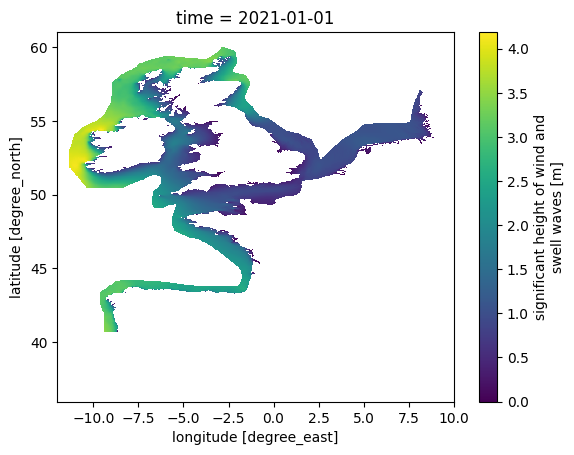

In [23]:
dataset['hs'].isel(time=0).plot(cmap='viridis')
plt.show()

In [ ]:
date= pd.to_datetime('2021-01-01')
time_url= f"https://opendap.4tu.nl/thredds/dodsC/data2/djht/f359cd0f-d135-416c-9118-e79dccba57b9/1/{date.strftime('%Y')}/TU-MREL_EU_ATL-2M_{date.strftime('%Y%m')}.nc"
